## <font color='blue'> Table Of Contents 
- Problem Statement
- Importing necessary libraries and reading the dataset 
- Exploratory Data Analysis
- Data Preparation for Model Building
- Model Building and Evaluation

### <font color = 'green'> Problem-Statement

**Predicting the risk of CHD ten years in advance.**

Framingham Heart Study - In 1948, scientists and participants embarked on an ambitious project to identify risk factors for heart disease. Today, the study remains a world-class epicenter for cutting-edge heart, brain, bone, and sleep research.
The 10-year cardiovascular risk of an individual can be estimated with the Framingham Risk Score, including for individuals without known cardiovascular disease. The Framingham Risk Score is based on findings of the Framingham Heart Study.

You can refer to the research website here: https://www.framinghamheartstudy.org/fhs-risk-functions/hard-coronary-heart-disease-10-year-risk/

#### <font color = 'green'> **Attribute Information**
Variables used in this study:-
- **Demographic Variables** - Gender, Age in Years, Education.
- **Behavioral Factors** - Current Smoker, No. of cigarettes per day.
- **Medical History** - BP Medication, Prevalent Stroke, Prevalent Hypertension, Diabetes

In addition, data from the first medical examination was taken into account. This
included: Total Cholesterol, Blood Pressure, BMI, Heart Rate, and Glucose.

### <font color = 'green'> **Import necessary libraries and read the dataset.**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [2]:
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## <font color = 'green'> **Exploratory Data Analysis**

### Perform Necessary Exploratory Data Analysis.

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


#### Let's check the distribution of the target feature

In [6]:
df.TenYearCHD.value_counts(normalize = True)*100

0    84.811321
1    15.188679
Name: TenYearCHD, dtype: float64

In [3]:
df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

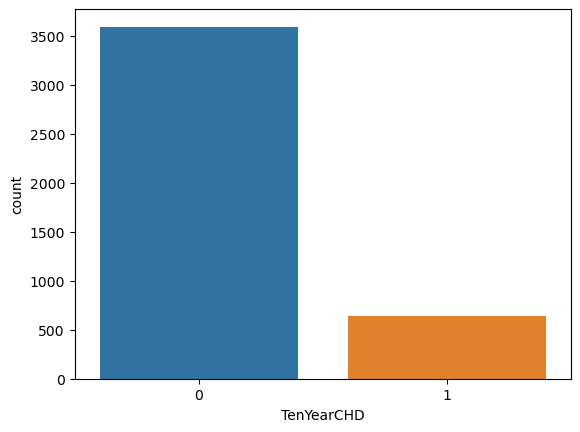

In [4]:
sns.countplot(x = df['TenYearCHD'])
plt.show()

#### <font color = 'blue'> Inference
- The target feature (i.e.TenYearCHD) has the values either 0 or 1 and its value 0 are occupy neary 85 percentage and rest of only have neary 15 percentage. 

## <font color = 'green'> Data Preparation for model buidling.

### Check for missing values and handle them with appropriate methods.

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.education.unique()

array([ 4.,  2.,  1.,  3., nan])

In [8]:
df.currentSmoker.unique()

array([0, 1], dtype=int64)

In [9]:
df.cigsPerDay.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [10]:
df.BPMeds.unique()

array([ 0.,  1., nan])

In [11]:
df.prevalentStroke.unique()

array([0, 1], dtype=int64)

In [12]:
df.prevalentHyp.unique()

array([0, 1], dtype=int64)

In [13]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [14]:
df.totChol.unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

In [15]:
df.sysBP.unique()

array([106. , 121. , 127.5, 150. , 130. , 180. , 138. , 100. , 141.5,
       162. , 133. , 131. , 142. , 124. , 114. , 140. , 112. , 122. ,
       139. , 108. , 123.5, 148. , 132. , 137.5, 102. , 110. , 182. ,
       115. , 134. , 147. , 124.5, 153.5, 160. , 153. , 111. , 116.5,
       206. ,  96. , 179.5, 119. , 116. , 156.5, 145. , 143.5, 158. ,
       157. , 126.5, 136. , 154. , 190. , 107. , 112.5, 164.5, 138.5,
       155. , 151. , 152. , 179. , 113. , 200. , 132.5, 126. , 123. ,
       141. , 135. , 187. , 127. , 160.5, 105. , 109. , 128. , 118. ,
       109.5, 117.5, 149. , 180.5, 136.5, 212. , 125. , 191. , 121.5,
       173. , 144. , 129.5, 117. , 144.5, 170. , 137. ,  94. , 119.5,
       143. , 166. , 139.5, 177.5, 129. , 159. , 130.5, 107.5, 189. ,
       168. , 197.5, 146. , 174. , 122.5,  98. , 131.5, 195. , 101. ,
       158.5,  97. , 151.5,  97.5, 120. , 204. , 157.5, 140.5, 171. ,
       215. ,  95. , 156. , 165. , 178. , 146.5, 113.5, 188. , 197. ,
        90. , 152.5,

In [16]:
df.diaBP.unique()

array([ 70. ,  81. ,  80. ,  95. ,  84. , 110. ,  71. ,  89. , 107. ,
        76. ,  88. ,  94. ,  64. ,  90. ,  78. ,  84.5,  70.5,  77.5,
        82. ,  68. ,  72.5,  91. , 121. ,  85.5,  85. ,  82.5,  74. ,
        92.5, 102. ,  98. , 101. ,  73. ,  92. ,  83.5,  63. , 114. ,
        69. ,  93. ,  66. ,  75. ,  79. ,  87. ,  99. ,  60. ,  67.5,
       106. ,  86.5, 104. ,  86. ,  61.5,  71.5,  76.5,  77. ,  88.5,
       105. ,  96. ,  97. , 100. ,  81.5, 106.5,  80.5, 124.5,  61. ,
        83. ,  67. ,  74.5,  66.5,  65. ,  72. ,  99.5, 122.5,  57. ,
        57.5, 111. ,  78.5, 104.5,  89.5, 112. ,  55. , 123. , 120. ,
        75.5, 118. ,  97.5,  59. , 133. ,  69.5,  95.5,  96.5, 135. ,
        64.5,  68.5,  98.5,  62. , 117. ,  59.5, 103. , 108.5,  73.5,
        87.5, 108. ,  93.5,  90.5, 114.5,  62.5,  94.5, 140. , 124. ,
        79.5, 109. ,  91.5, 115. , 102.5,  65.5, 105.5, 103.5,  63.5,
       107.5, 142.5, 109.5,  58. , 117.5, 116.5, 100.5, 116. , 119. ,
        54. , 132. ,

In [17]:
df.BMI.unique()

array([26.97, 28.73, 25.34, ..., 26.7 , 43.67, 20.91])

In [18]:
df.heartRate.unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  67.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,
        66.,  87., 110.,  81.,  56.,  89.,  82.,  48., 105.,  61.,  54.,
        69.,  52.,  94., 140., 130.,  58., 108., 104.,  91.,  53.,  nan,
       106.,  59.,  51., 102., 107., 112., 125., 103.,  44.,  47.,  45.,
        97., 122., 120.,  99., 115., 143., 101.,  46.])

In [19]:
df.glucose.unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  nan,  72.,  89.,  65., 113.,  75.,  83.,  66.,  74.,  63.,
        87., 225.,  90.,  80., 100., 215.,  98.,  62.,  95.,  94.,  55.,
        82.,  93.,  73.,  45., 202.,  68.,  97., 104.,  96., 126., 120.,
       105.,  71.,  56.,  60., 117., 102.,  58.,  92., 109.,  86., 107.,
        54.,  67.,  69.,  57.,  91., 132., 150.,  59.,  81., 115., 140.,
       112., 118., 143., 114., 160., 110., 123., 108., 145., 122., 137.,
       106., 127., 205., 130., 101.,  47.,  53., 216., 163., 144., 116.,
       121., 172., 124., 111.,  40., 186., 223., 325.,  44., 156., 268.,
        50., 274., 292., 255., 136., 206., 131., 148., 297.,  43., 173.,
        48., 386., 155., 147., 170.,  52., 320., 254., 394., 270., 244.,
       183., 142., 119., 135., 167., 207., 129., 177., 250., 294., 166.,
       125., 332., 368., 348., 248., 370., 193., 191., 256., 235., 210.,
       260.])

In [20]:
df.TenYearCHD.unique()

array([0, 1], dtype=int64)

In [21]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
df.median()

male                 0.0
age                 49.0
education            2.0
currentSmoker        0.0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke      0.0
prevalentHyp         0.0
diabetes             0.0
totChol            234.0
sysBP              128.0
diaBP               82.0
BMI                 25.4
heartRate           75.0
glucose             78.0
TenYearCHD           0.0
dtype: float64

In [23]:
df = df.apply(lambda x: x.fillna(x.median()))

In [24]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Check for duplicate records.

In [25]:
df.duplicated().sum()

0

###  Check for the presence of outliers and handle them with appropriate techniques.

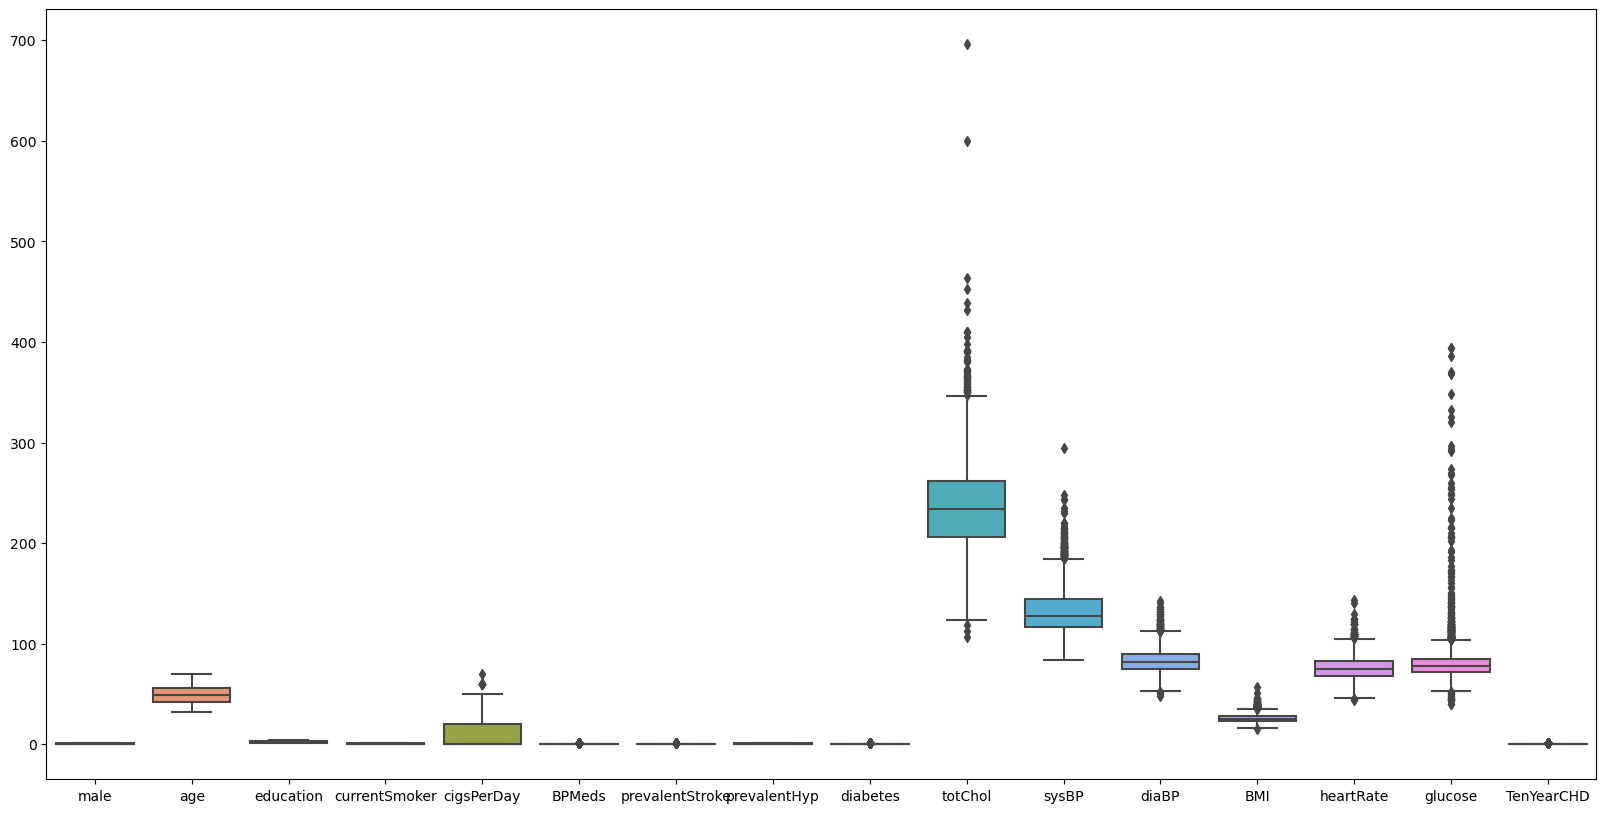

In [26]:
plt.figure(figsize = (20,10))
sns.boxplot(df)
plt.show()

####  Inference
- Observed there are few variables have outliers that is 'cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate'and'glucose'

### Let's check correlation between the variables

<Figure size 1500x1500 with 0 Axes>

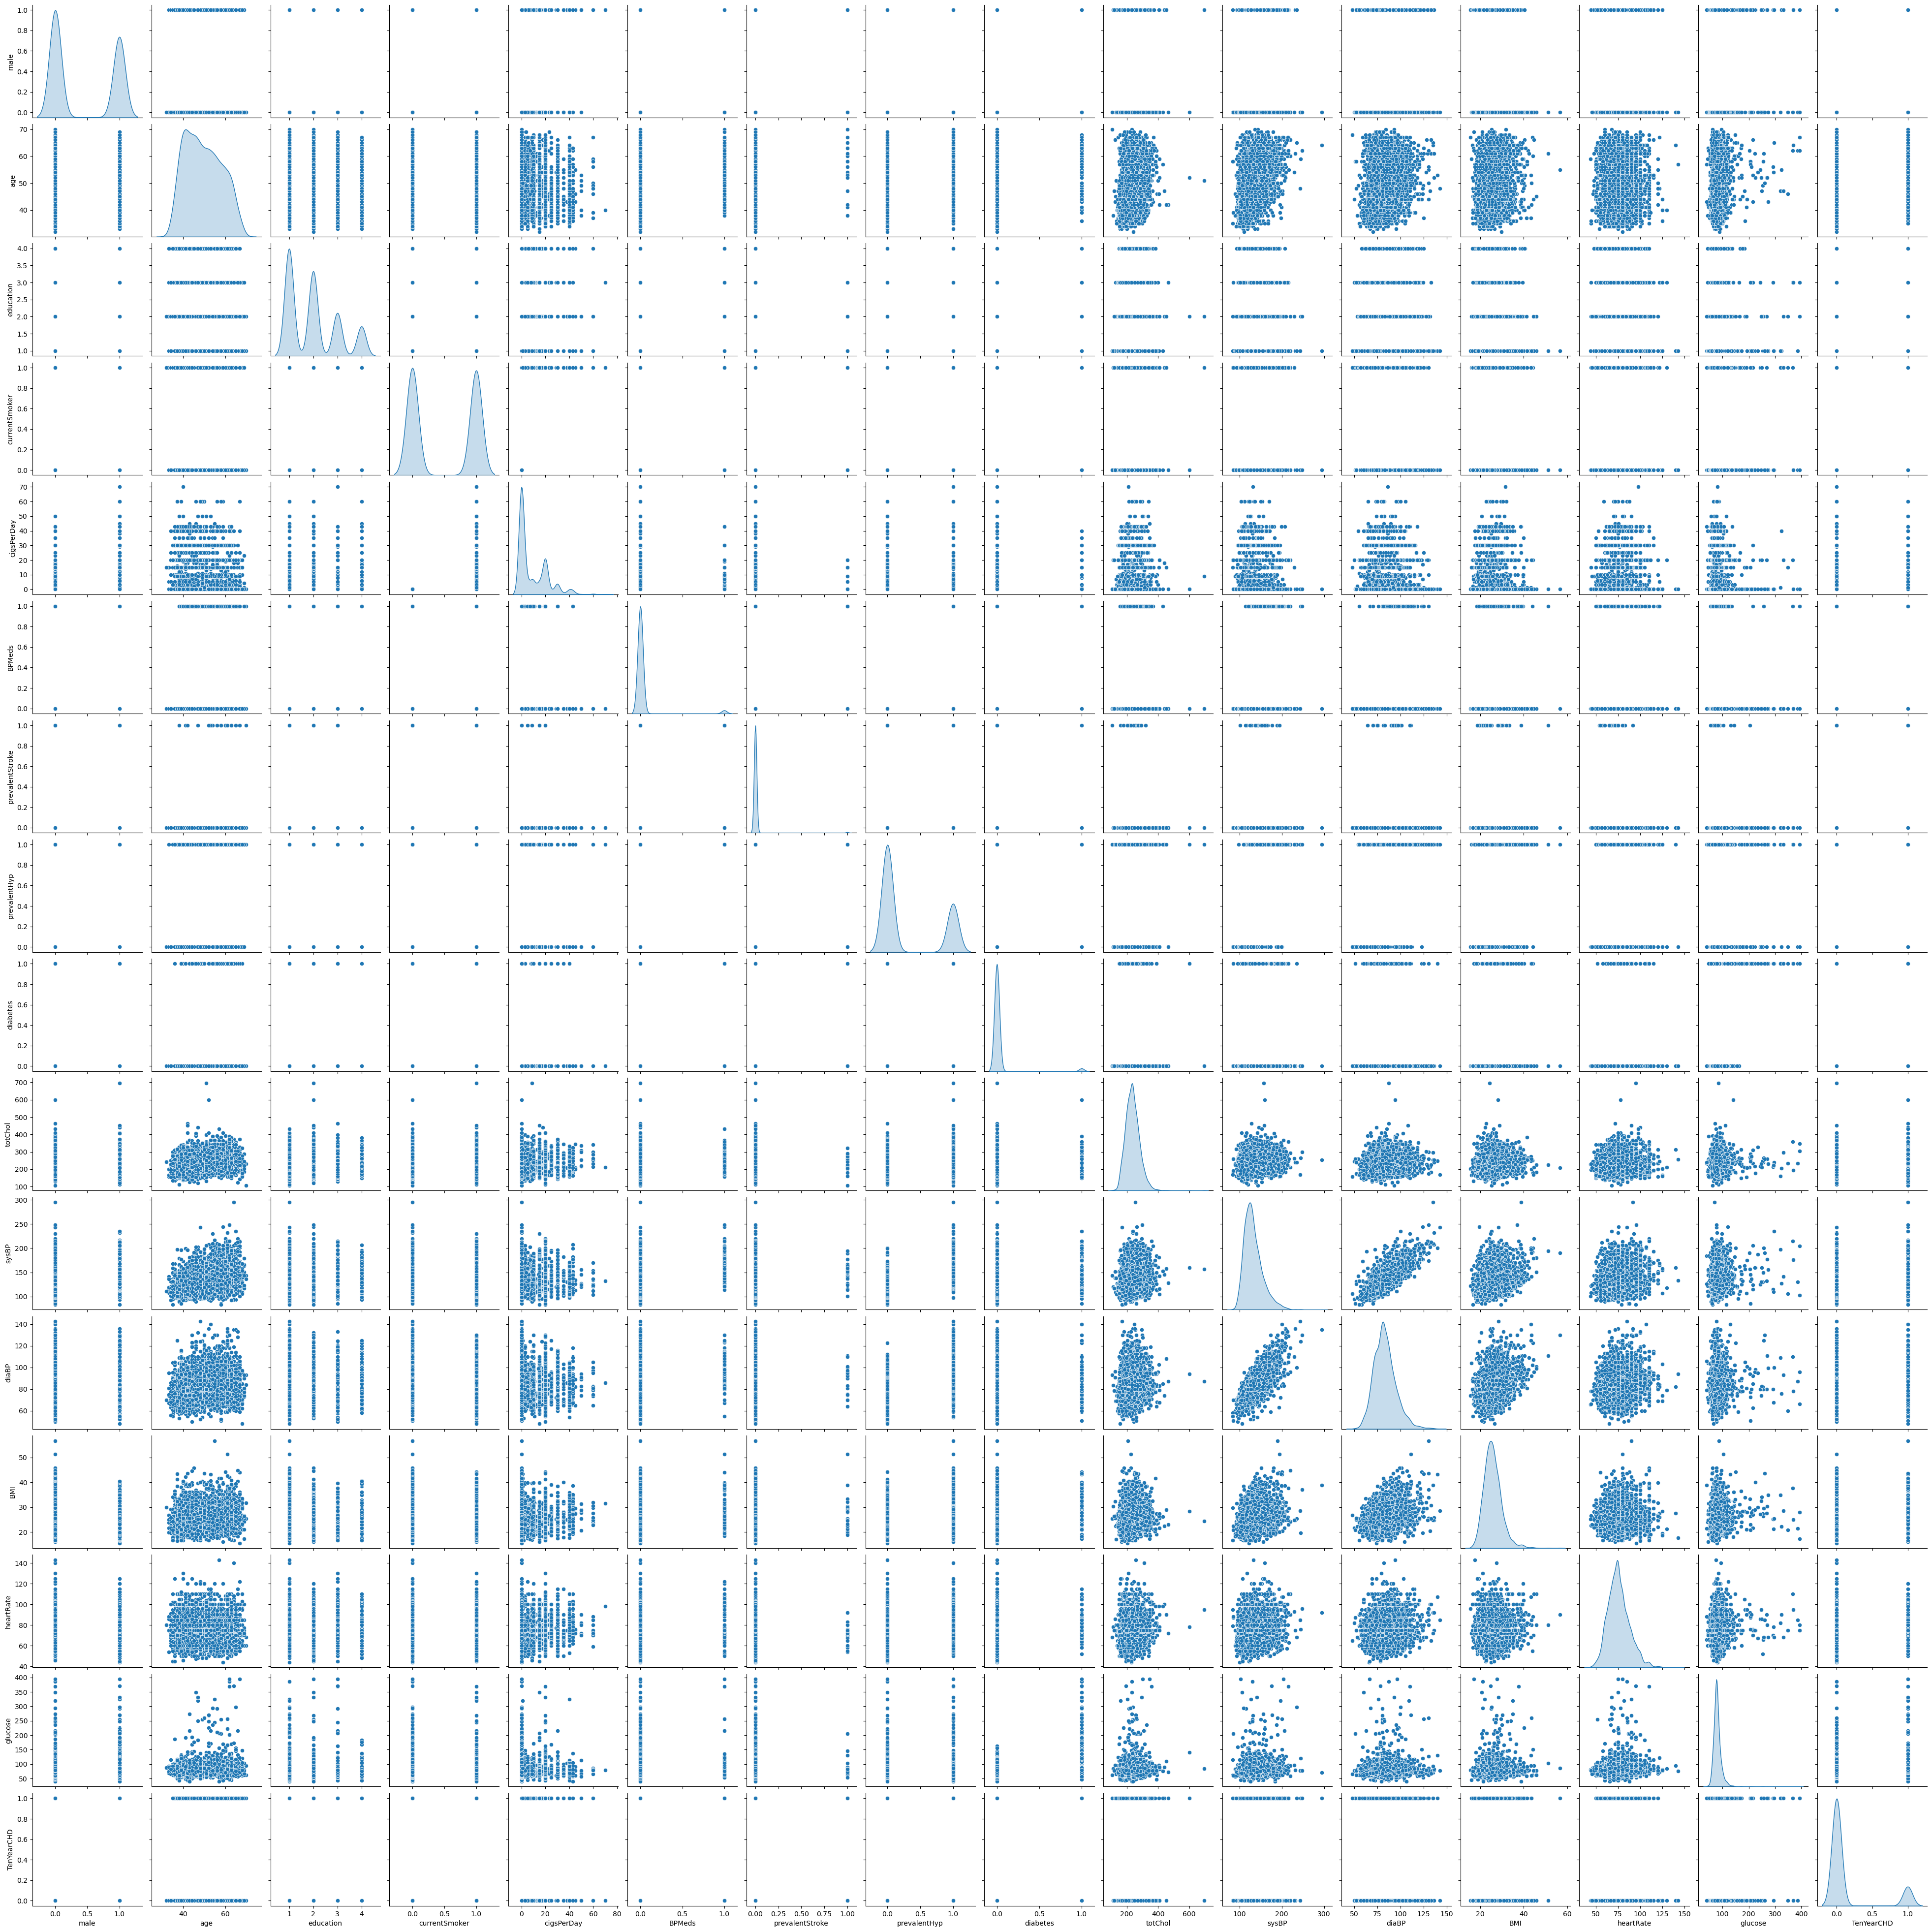

In [29]:
plt.figure(figsize = (15,15))
sns.pairplot(df, diag_kind = 'kde')
plt.show()

In [30]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017265,0.197026,0.314849,-0.051544,-0.004550,0.005853,0.015693,-0.069643,-0.035879,0.058199,0.081852,-0.116933,0.009970,0.088374
age,-0.029014,1.000000,-0.164016,-0.213662,-0.192017,0.121011,0.057679,0.306799,0.101314,0.260527,0.394053,0.205586,0.135470,-0.012868,0.117878,0.225408
education,0.017265,-0.164016,1.000000,0.018270,0.007856,-0.010445,-0.035178,-0.080780,-0.038204,-0.022851,-0.128139,-0.061326,-0.135744,-0.053658,-0.034090,-0.053570
currentSmoker,0.197026,-0.213662,0.018270,1.000000,0.760326,-0.048348,-0.032980,-0.103710,-0.044285,-0.046391,-0.130281,-0.107933,-0.167368,0.062661,-0.055082,0.019448
cigsPerDay,0.314849,-0.192017,0.007856,0.760326,1.000000,-0.044697,-0.032248,-0.065541,-0.036173,-0.027134,-0.088393,-0.056768,-0.092647,0.074258,-0.056792,0.058729
BPMeds,-0.051544,0.121011,-0.010445,-0.048348,-0.044697,1.000000,0.114614,0.258580,0.051407,0.078642,0.251479,0.192254,0.099617,0.015139,0.049142,0.086448
prevalentStroke,-0.004550,0.057679,-0.035178,-0.032980,-0.032248,0.114614,1.000000,0.074791,0.006955,0.000160,0.057000,0.045153,0.024283,-0.017672,0.018730,0.061823
prevalentHyp,0.005853,0.306799,-0.080780,-0.103710,-0.065541,0.258580,0.074791,1.000000,0.077752,0.162696,0.696656,0.615840,0.300537,0.146751,0.083406,0.177458
diabetes,0.015693,0.101314,-0.038204,-0.044285,-0.036173,0.051407,0.006955,0.077752,1.000000,0.040186,0.111265,0.050260,0.086058,0.048989,0.606495,0.097344
totChol,-0.069643,0.260527,-0.022851,-0.046391,-0.027134,0.078642,0.000160,0.162696,0.040186,1.000000,0.207350,0.163408,0.115035,0.090541,0.045677,0.081749


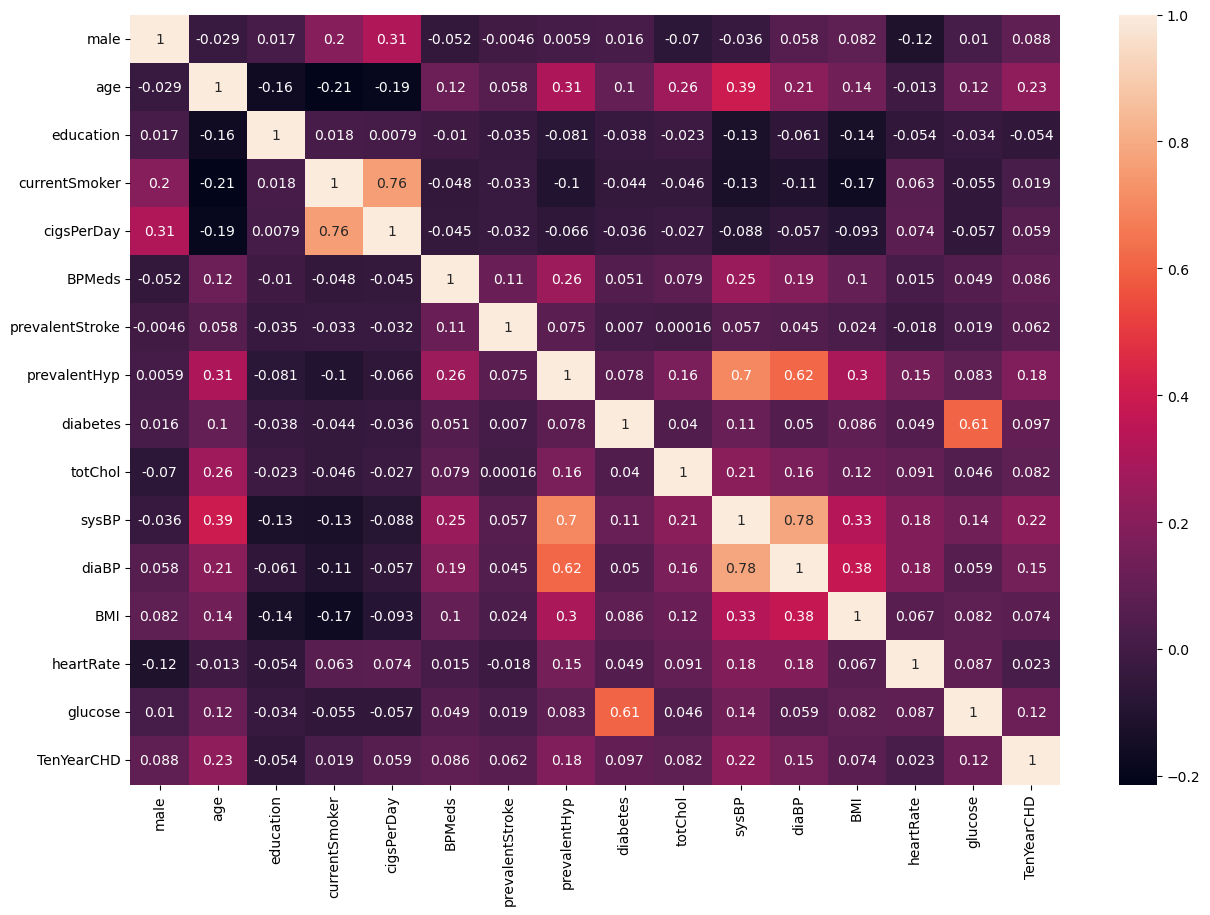

In [33]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, )
plt.show()

#### <font color = 'blue'> Inference
- In this dataset have only few variables are correlated each other. i.e. 'currentsmoker vs cigsperday', 'diaBP vs sysBP', 'prevalentHyp vs sysBP', 'prevalentHyp vs diaBP' and 'diabetes vs glucose'.
- Orange color indicates strong correalted among others and Dark color indicates less correlated variables among them.

###  Lets define a function to treat the outliers using IQR approach

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

In [35]:
for column in df[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]:
    lr, ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

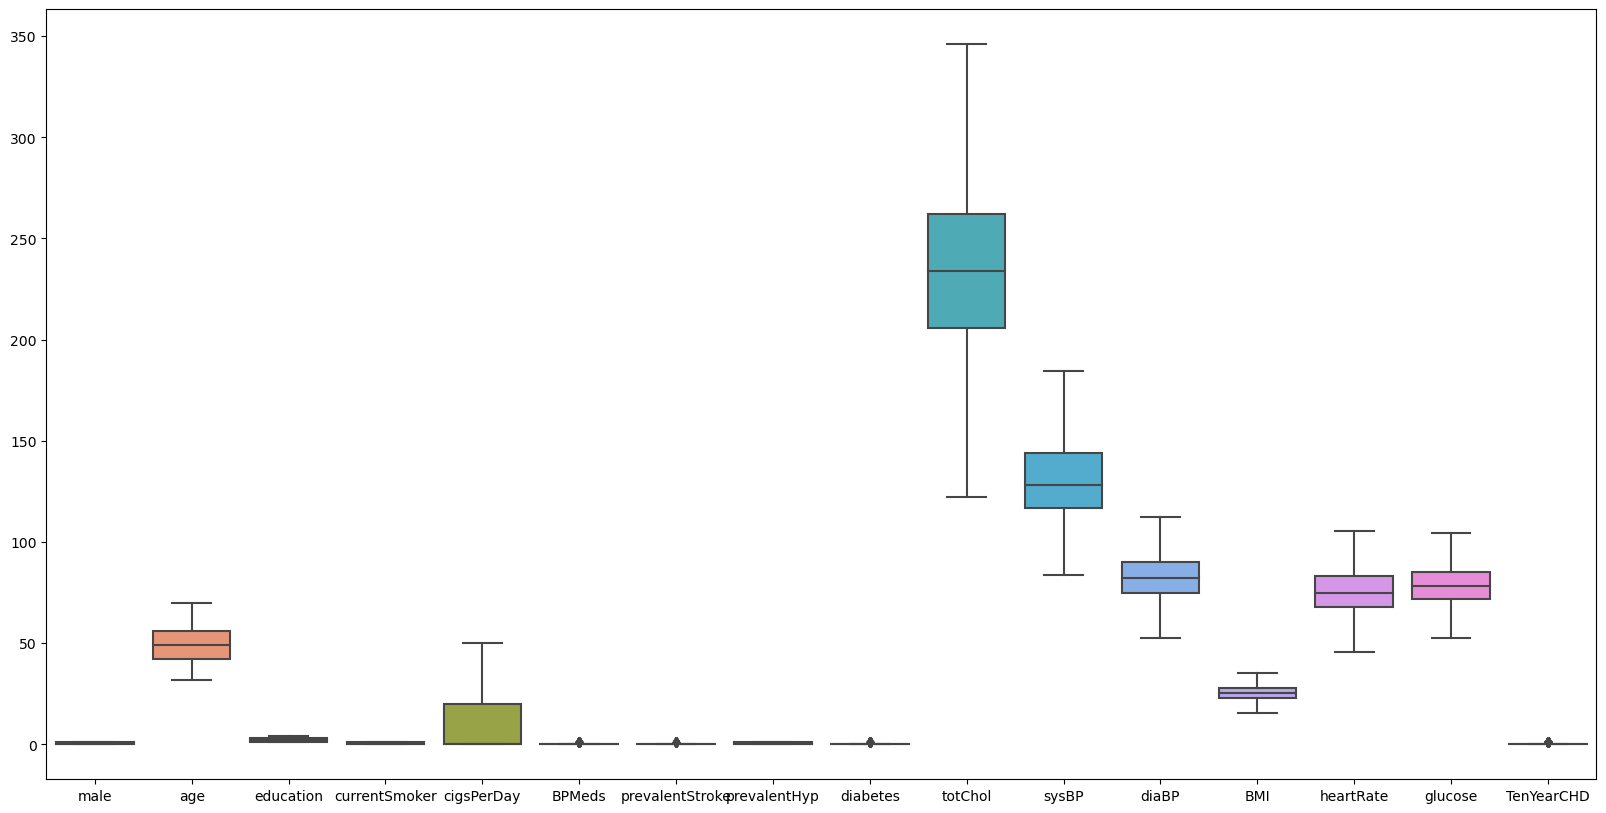

In [36]:
plt.figure(figsize = (20,10))
sns.boxplot(df)
plt.show()

###  Split the dataset into two parts (i.e. 70% train and 30% test).

In [37]:
X = df.drop('TenYearCHD', axis = 1)
y = df[['TenYearCHD']]     # Let's consider 'TenYearCHD' as target feature

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

### Scale the data using appropriate approach.

In [39]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [40]:
X_train.iloc[:,:] = std_scaler.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = std_scaler.fit_transform(X_test.iloc[:,:])

In [41]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3958,1.156291,-1.240711,-0.969836,1.008799,2.880051,-0.170664,-0.088373,1.488490,-0.159907,1.278598,2.202121,1.498081,0.010881,-0.753473,1.011966
366,1.156291,-1.124612,1.018060,1.008799,2.203049,-0.170664,-0.088373,-0.671822,-0.159907,-1.205069,0.050844,-0.242326,-1.012897,-1.094894,-1.887859
1244,-0.864835,-0.079720,1.018060,-0.991278,-0.758833,-0.170664,-0.088373,-0.671822,-0.159907,-0.338128,-0.674306,-0.416367,-1.192321,-0.497407,-0.569757
3359,1.156291,1.081270,-0.969836,-0.991278,-0.758833,-0.170664,-0.088373,-0.671822,-0.159907,0.880274,0.606792,0.758408,0.100594,-0.753473,-1.448492
105,-0.864835,1.545666,-0.969836,-0.991278,-0.758833,-0.170664,-0.088373,-0.671822,-0.159907,0.856843,0.147530,-0.068285,0.280019,0.782921,-2.063606


In [42]:
X_test.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
999,-0.872796,-1.456049,0.010129,-0.981307,-0.751237,-0.180187,-0.039684,-0.669886,-0.168209,-1.850363,-0.966140,-1.218985,0.325274,0.915216,-0.118155
1563,-0.872796,0.551193,-0.981001,-0.981307,-0.751237,-0.180187,-0.039684,1.492791,-0.168209,1.605715,1.371340,1.014270,0.965182,-0.050159,-0.376391
3750,-0.872796,-0.511464,0.010129,1.019049,0.103480,-0.180187,-0.039684,1.492791,-0.168209,-0.086071,1.517432,1.639582,-0.658387,2.143876,-0.462470
1859,-0.872796,2.086144,0.010129,1.019049,-0.494822,-0.180187,-0.039684,1.492791,-0.168209,2.185757,1.249596,-0.415013,-0.296125,0.827455,-0.204234
1686,1.145743,-1.692195,1.001260,1.019049,0.530838,-0.180187,-0.039684,-0.669886,-0.168209,-0.496934,0.056507,0.299628,0.780085,0.915216,0.398317


## <font color = 'green'> **Model buidling - Logistic Regression Model**

### Buid a logistic regression model and evaluate the model performance.

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)

C:\Users\SILAMBARASAN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [45]:
y_test

,TenYearCHD
999,0
1563,0
3750,0
1859,0
1686,0
...,...
3882,0
416,0
3519,0
4160,0


In [46]:
y_pred = model.predict(X_test)

In [62]:
y_pre = pd.DataFrame(model.predict(X_test), index = X_test.index)
pd.concat([y_test, y_pre], axis = 1)

,TenYearCHD,0
999,0,0
1563,0,0
3750,0,0
1859,0,0
1686,0,0
...,...,...
3882,0,0
416,0,0
3519,0,0
4160,0,0


In [55]:
a = model.intercept_[0]
print('The Intercept value of this model is: {}'.format(a))

The Intercept value of this model is: -1.9706976798012745


In [49]:
model.coef_[0]

array([ 0.24699689,  0.50821587, -0.01758197,  0.02419955,  0.24994157,
        0.07799869,  0.0745835 ,  0.02706331,  0.10125584,  0.06491658,
        0.35368189, -0.05891646,  0.05718421, -0.01591053,  0.06178033])

In [50]:
X_train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [51]:
dict(zip(X_train.columns,model.coef_[0]))

{'male': 0.24699689488228618,
 'age': 0.5082158730185965,
 'education': -0.01758196533771038,
 'currentSmoker': 0.0241995505097551,
 'cigsPerDay': 0.24994157251450239,
 'BPMeds': 0.07799868706382067,
 'prevalentStroke': 0.07458349879919919,
 'prevalentHyp': 0.027063311408834858,
 'diabetes': 0.10125584157204814,
 'totChol': 0.06491658287506366,
 'sysBP': 0.35368189404193,
 'diaBP': -0.05891645942152929,
 'BMI': 0.05718421174415293,
 'heartRate': -0.01591052847076693,
 'glucose': 0.06178033183433234}

In [76]:
b = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of the test model is: {}'.format(b))

The accuracy of the test model is: 0.8522012578616353


In [56]:
y1_pred = model.predict(X_train)

In [77]:
c = metrics.accuracy_score(y_train, y1_pred)
print('The accuracy of the train model is: {}'.format(c))

The accuracy of the train model is: 0.8534366576819407


## <font color = 'green'> Metrics

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y1_pred, y_train))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2929
           1       0.06      0.67      0.11        39

    accuracy                           0.85      2968
   macro avg       0.53      0.76      0.51      2968
weighted avg       0.98      0.85      0.91      2968



- **We see that accuracy is 0.85, but recall, f1-score for class-1 is quite low due to class imbalance.**

In [79]:
y.value_counts() / len(y) *100

TenYearCHD
0             84.811321
1             15.188679
dtype: float64

In [64]:
print(y.value_counts())

TenYearCHD
0             3596
1              644
dtype: int64


In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

In [71]:
model.classes_

array([0, 1], dtype=int64)

In [72]:
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
cm

array([[1072,    4],
       [ 184,   12]], dtype=int64)

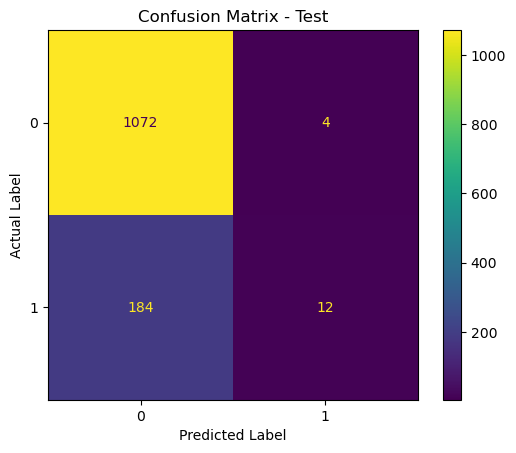

In [73]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels = model.classes_)
display = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
display.plot()
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.show()

## <font color = 'green'> Plot ROC Curve

In [74]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Text(0.02, 0.9, "('AUC Score:', 0.5288)")

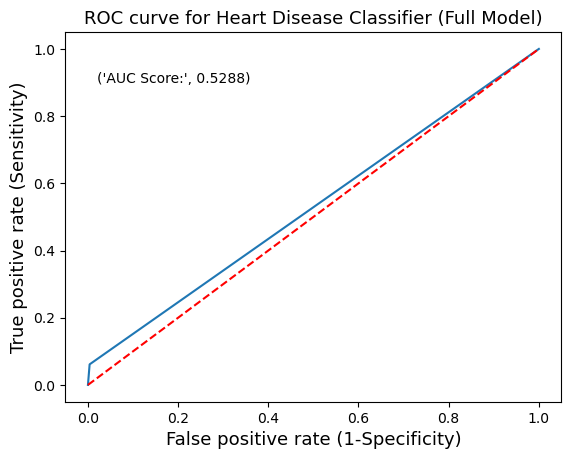

In [75]:
# plot the ROC curve
plt.plot(fpr, tpr)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Heart Disease Classifier (Full Model)', fontsize = 13)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 13)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 13)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))



#### <font color = 'blue'> Inference
- An AUC score of 0.53 signifies that the model is not good.
- It is not able to correctly classify the outcome.

**Further we can try out balancing the target variable and apply feature engineering techniques and bulid other models on this dataset to achieve better performance 0f the model.**